# QG and SQG spectra: forced-dissipative turbulence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyqg
from pyqg import sqg_model
from pyqg import diagnostic_tools as tools

import xarray

import pyfftw

In [2]:
L    = 2.*np.pi
Nx   = 256
beta = 0.
H    = 1.
rek  = 0.
rd   = None
tmax = 40
dt   = 0.001
taveint = 1

kin  = 10
kout = 11
rmag = 1e2

In [3]:
m_qg = pyqg.BTModel(L=L, nx=Nx, beta=beta, H=H, rek=rek, rd=rd, tmax=tmax, dt=dt, taveint=taveint,
                   parameterization = pyqg.parameterizations.RingForcing(k_in_forc=kin, k_out_forc=kout, mag_noise_forc=rmag))

m_sqg = sqg_model.SQGModel(L=L, nx=Nx, beta=beta, H=H, tmax = tmax, dt=dt, 
                           taveint=taveint, twrite=400,
                   parameterization = pyqg.parameterizations.RingForcing(k_in_forc=kin, k_out_forc=kout, mag_noise_forc=rmag))

INFO:  Logger initialized
INFO:  Logger initialized


In [4]:
fk = m_qg.wv != 0
ckappa = np.zeros_like(m_qg.wv2)
ckappa[fk] = np.sqrt( m_qg.wv2[fk]*(1. + (m_qg.wv2[fk]/36.)**2) )**-1
nhx,nhy = m_qg.wv2.shape

In [5]:
#Pi_hat = (np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa)
Pi_hat = (np.random.randn(nhx,nhy) +1j*np.random.randn(nhx,nhy))

Pi = m_qg.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()

Pi_hat = m_qg.fft( Pi )
KEaux = m_qg.spec_var( m_qg.wv*Pi_hat )
pih = ( Pi_hat/np.sqrt(KEaux) )

scale = 10000.

qih = -m_qg.wv2*pih
qi = m_qg.ifft(qih)/scale

bih = m_sqg.wv*pih
bi = m_sqg.ifft(bih)/scale

print('Max PV  initial = ', np.max(qi))
print('Max B   initial = ', np.max(bi))
print('Max Psi initial = ', np.max(Pi))

Max PV  initial =  0.051630730929388906
Max B   initial =  0.0005196375851195774
Max Psi initial =  0.027891956958733425


Text(0, 0.5, 'y')

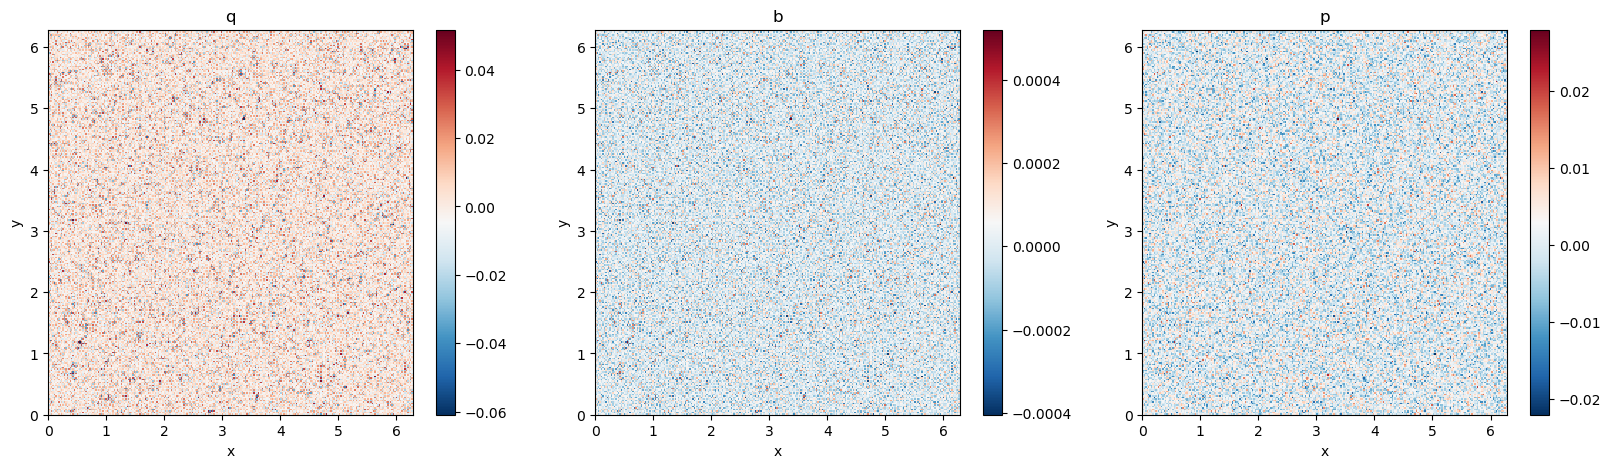

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.pcolormesh(m_qg.x, m_qg.y, qi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('q')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(132)
plt.pcolormesh(m_sqg.x, m_sqg.y, bi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('b')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(133)
plt.pcolormesh(m_qg.x, m_qg.y, Pi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('p')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
# initialize the model with that initial condition
m_qg.set_q(qi)

m_sqg.set_q(bi)

In [8]:
# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=40):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

def plot_b(m, bmax=4):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-bmax, bmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

INFO: Step: 1000, Time: 1.00e+00, KE: 8.32e-02, CFL: 0.050
INFO: Step: 2000, Time: 2.00e+00, KE: 1.41e-01, CFL: 0.061
INFO: Step: 3000, Time: 3.00e+00, KE: 2.08e-01, CFL: 0.070
INFO: Step: 4000, Time: 4.00e+00, KE: 2.74e-01, CFL: 0.091
INFO: Step: 5000, Time: 5.00e+00, KE: 3.16e-01, CFL: 0.077
INFO: Step: 6000, Time: 6.00e+00, KE: 3.88e-01, CFL: 0.100
INFO: Step: 7000, Time: 7.00e+00, KE: 4.77e-01, CFL: 0.119
INFO: Step: 8000, Time: 8.00e+00, KE: 5.61e-01, CFL: 0.117
INFO: Step: 9000, Time: 9.00e+00, KE: 6.28e-01, CFL: 0.127
INFO: Step: 10000, Time: 1.00e+01, KE: 7.06e-01, CFL: 0.134


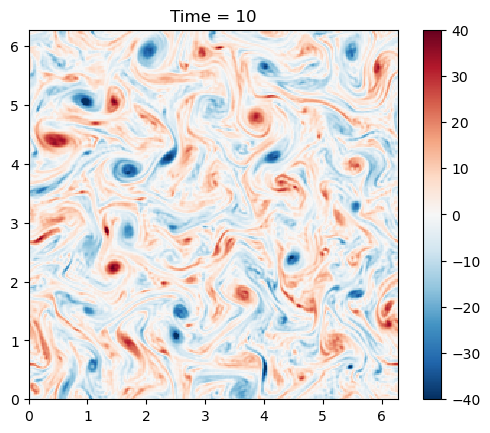

INFO: Step: 11000, Time: 1.10e+01, KE: 7.66e-01, CFL: 0.122
INFO: Step: 12000, Time: 1.20e+01, KE: 8.51e-01, CFL: 0.142
INFO: Step: 13000, Time: 1.30e+01, KE: 9.21e-01, CFL: 0.150
INFO: Step: 14000, Time: 1.40e+01, KE: 9.88e-01, CFL: 0.162
INFO: Step: 15000, Time: 1.50e+01, KE: 1.06e+00, CFL: 0.140
INFO: Step: 16000, Time: 1.60e+01, KE: 1.12e+00, CFL: 0.158
INFO: Step: 17000, Time: 1.70e+01, KE: 1.19e+00, CFL: 0.158
INFO: Step: 18000, Time: 1.80e+01, KE: 1.26e+00, CFL: 0.175
INFO: Step: 19000, Time: 1.90e+01, KE: 1.33e+00, CFL: 0.153
INFO: Step: 20000, Time: 2.00e+01, KE: 1.40e+00, CFL: 0.162


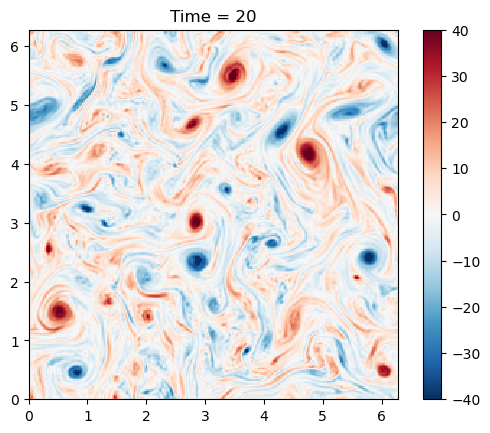

INFO: Step: 21000, Time: 2.10e+01, KE: 1.46e+00, CFL: 0.189
INFO: Step: 22000, Time: 2.20e+01, KE: 1.54e+00, CFL: 0.175
INFO: Step: 23000, Time: 2.30e+01, KE: 1.60e+00, CFL: 0.246
INFO: Step: 24000, Time: 2.40e+01, KE: 1.67e+00, CFL: 0.193
INFO: Step: 25000, Time: 2.50e+01, KE: 1.72e+00, CFL: 0.178
INFO: Step: 26000, Time: 2.60e+01, KE: 1.80e+00, CFL: 0.202
INFO: Step: 27000, Time: 2.70e+01, KE: 1.89e+00, CFL: 0.222
INFO: Step: 28000, Time: 2.80e+01, KE: 1.97e+00, CFL: 0.227
INFO: Step: 29000, Time: 2.90e+01, KE: 2.03e+00, CFL: 0.220
INFO: Step: 30000, Time: 3.00e+01, KE: 2.10e+00, CFL: 0.210


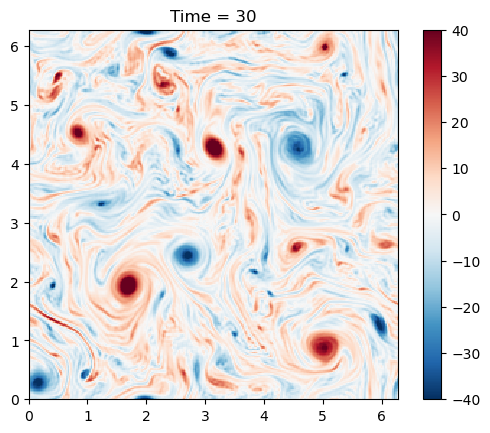

INFO: Step: 31000, Time: 3.10e+01, KE: 2.17e+00, CFL: 0.221
INFO: Step: 32000, Time: 3.20e+01, KE: 2.24e+00, CFL: 0.275
INFO: Step: 33000, Time: 3.30e+01, KE: 2.31e+00, CFL: 0.226
INFO: Step: 34000, Time: 3.40e+01, KE: 2.38e+00, CFL: 0.278
INFO: Step: 35000, Time: 3.50e+01, KE: 2.45e+00, CFL: 0.305
INFO: Step: 36000, Time: 3.60e+01, KE: 2.51e+00, CFL: 0.245
INFO: Step: 37000, Time: 3.70e+01, KE: 2.57e+00, CFL: 0.237
INFO: Step: 38000, Time: 3.80e+01, KE: 2.64e+00, CFL: 0.202
INFO: Step: 39000, Time: 3.90e+01, KE: 2.70e+00, CFL: 0.219
INFO: Step: 40000, Time: 4.00e+01, KE: 2.77e+00, CFL: 0.270


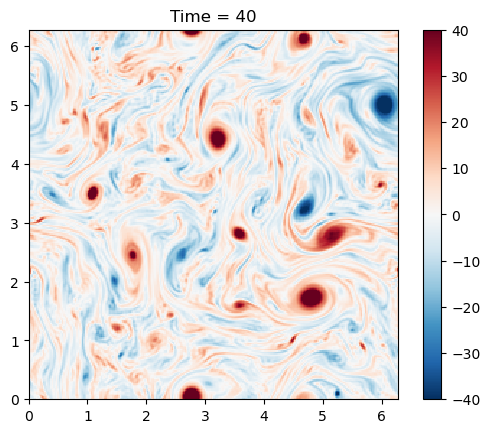

In [9]:
for _ in m_qg.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_q(m_qg)

In [11]:
#for _ in m_sqg.run_with_snapshots(tsnapstart=0, tsnapint=10):
#    plot_b(m_sqg)

In [12]:
energy_qg     = m_qg.get_diagnostic('KEspec')
enstrophy_qg  = m_qg.get_diagnostic('Ensspec')

#energy_sqg    = m_sqg.get_diagnostic('KEspec')
#enstrophy_sqg = m_sqg.get_diagnostic('Ensspec')

In [13]:
# this makes it easy to calculate an isotropic spectrum
kr, energy_iso_qg    = tools.calc_ispec(m_qg, energy_qg.squeeze())
_, enstrophy_iso_qg  = tools.calc_ispec(m_qg, enstrophy_qg.squeeze())

#kr, energy_iso_sqg   = tools.calc_ispec(m_sqg, energy_sqg.squeeze())
#_, enstrophy_iso_sqg = tools.calc_ispec(m_sqg, enstrophy_sqg.squeeze())

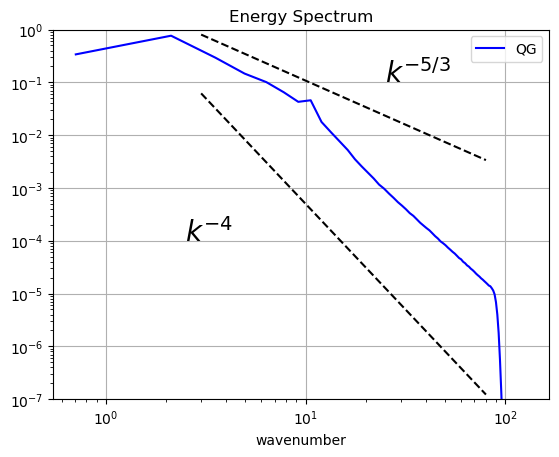

In [14]:
ks = np.array([3.,80])
es1 = 5*ks**-4
es2 = 5*ks**(-5/3)
plt.loglog(kr, energy_iso_qg,  '-b', label='QG')
#plt.loglog(kr, energy_iso_sqg, '-r', label='SQG')
plt.loglog(ks, es1, 'k--')
plt.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
plt.loglog(ks, es2, 'k--')
plt.text(25,.1,r'$k^{-5/3}$',fontsize=20)
plt.ylim(1.e-7,1.e0)
plt.xlabel('wavenumber')
plt.title('Energy Spectrum')
plt.grid()
plt.legend()

plt.savefig('qg_forced_take1', facecolor='white')

In [14]:
#np.save('QG_SQG_spectra_forced_Nx256.npy', [ks, kr, energy_iso_qg, energy_iso_sqg], fix_imports=True)

In [15]:
#[ks, kr, energy_iso_qg, energy_iso_sqg] = np.load('QG_SQG_spectra_Nx256.npy', allow_pickle=True)